In [1]:
from py_ball.team import Team
from py_ball.image import Logo

# data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# headers
from config import py_ball_headers

# tqdm
from tqdm.notebook import tqdm

# team ids
from utils import team_ids, ID_TO_TEAM_NBA, set_size, team_colors

In [2]:
team_info = {
  'TEAM_ID': [],
  'GP': [],
  'W': [],
  'L': [],
  'W_PCT': [],
  'MIN': [],
  'E_OFF_RATING': [],
  'OFF_RATING': [],
  'E_DEF_RATING': [],
  'DEF_RATING': [],
  'E_NET_RATING': [],
  'NET_RATING': [],
  'AST_PCT': [],
  'AST_TO': [],
  'AST_RATIO': [],
  'OREB_PCT': [],
  'DREB_PCT': [],
  'REB_PCT': [],
  'TM_TOV_PCT': [],
  'EFG_PCT': [],
  'TS_PCT': [],
  'E_PACE': [],
  'PACE': [],
  'PACE_PER40': [],
  'POSS': [],
  'PIE': []
}

In [3]:
for t in tqdm(team_ids):
    t_id = team_ids[t]
    team = Team(py_ball_headers,
                team_id=t_id,
                per_mode='Per100Plays',
                measure_type='Advanced',
                season='2021-22').data['OverallTeamDashboard'][0]
    for k in team_info:
        if k == 'TEAM_ID':
            team_info[k].append(t_id)
        else:
            team_info[k].append(team[k])

  0%|          | 0/30 [00:00<?, ?it/s]

In [4]:
df = pd.DataFrame(team_info)
df['TEAM_ABBREVIATION'] = [ID_TO_TEAM_NBA[i] for i in df['TEAM_ID']]

In [5]:
df.sort_values(by='OFF_RATING', inplace=True, ascending=False)
df.head()

,TEAM_ID,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,TEAM_ABBREVIATION
20,1610612762,21,14,7,0.667,1008.0,112.8,115.2,103.0,105.4,...,0.528,0.151,0.560,0.593,100.3,98.17,81.81,2062,0.552,UTA
5,1610612744,21,18,3,0.857,1013.0,111.0,112.4,97.8,99.8,...,0.522,0.163,0.563,0.592,101.9,100.19,83.49,2114,0.582,GSW
22,1610612737,21,11,10,0.524,1008.0,110.8,112.2,107.8,109.5,...,0.511,0.123,0.530,0.563,99.8,98.38,81.98,2066,0.516,ATL
7,1610612757,22,11,11,0.500,1056.0,110.1,111.6,110.2,111.7,...,0.510,0.135,0.535,0.567,100.0,98.68,82.23,2175,0.499,POR
14,1610612766,23,13,10,0.565,1119.0,109.2,111.2,109.5,111.3,...,0.479,0.127,0.530,0.557,103.4,101.66,84.72,2366,0.494,CHA


In [6]:
uta_logo = Image.open('media/utah_logo.png')
def get_img_loc(x, h, w, ratio):
    return x, (x+w), h, (h+w)

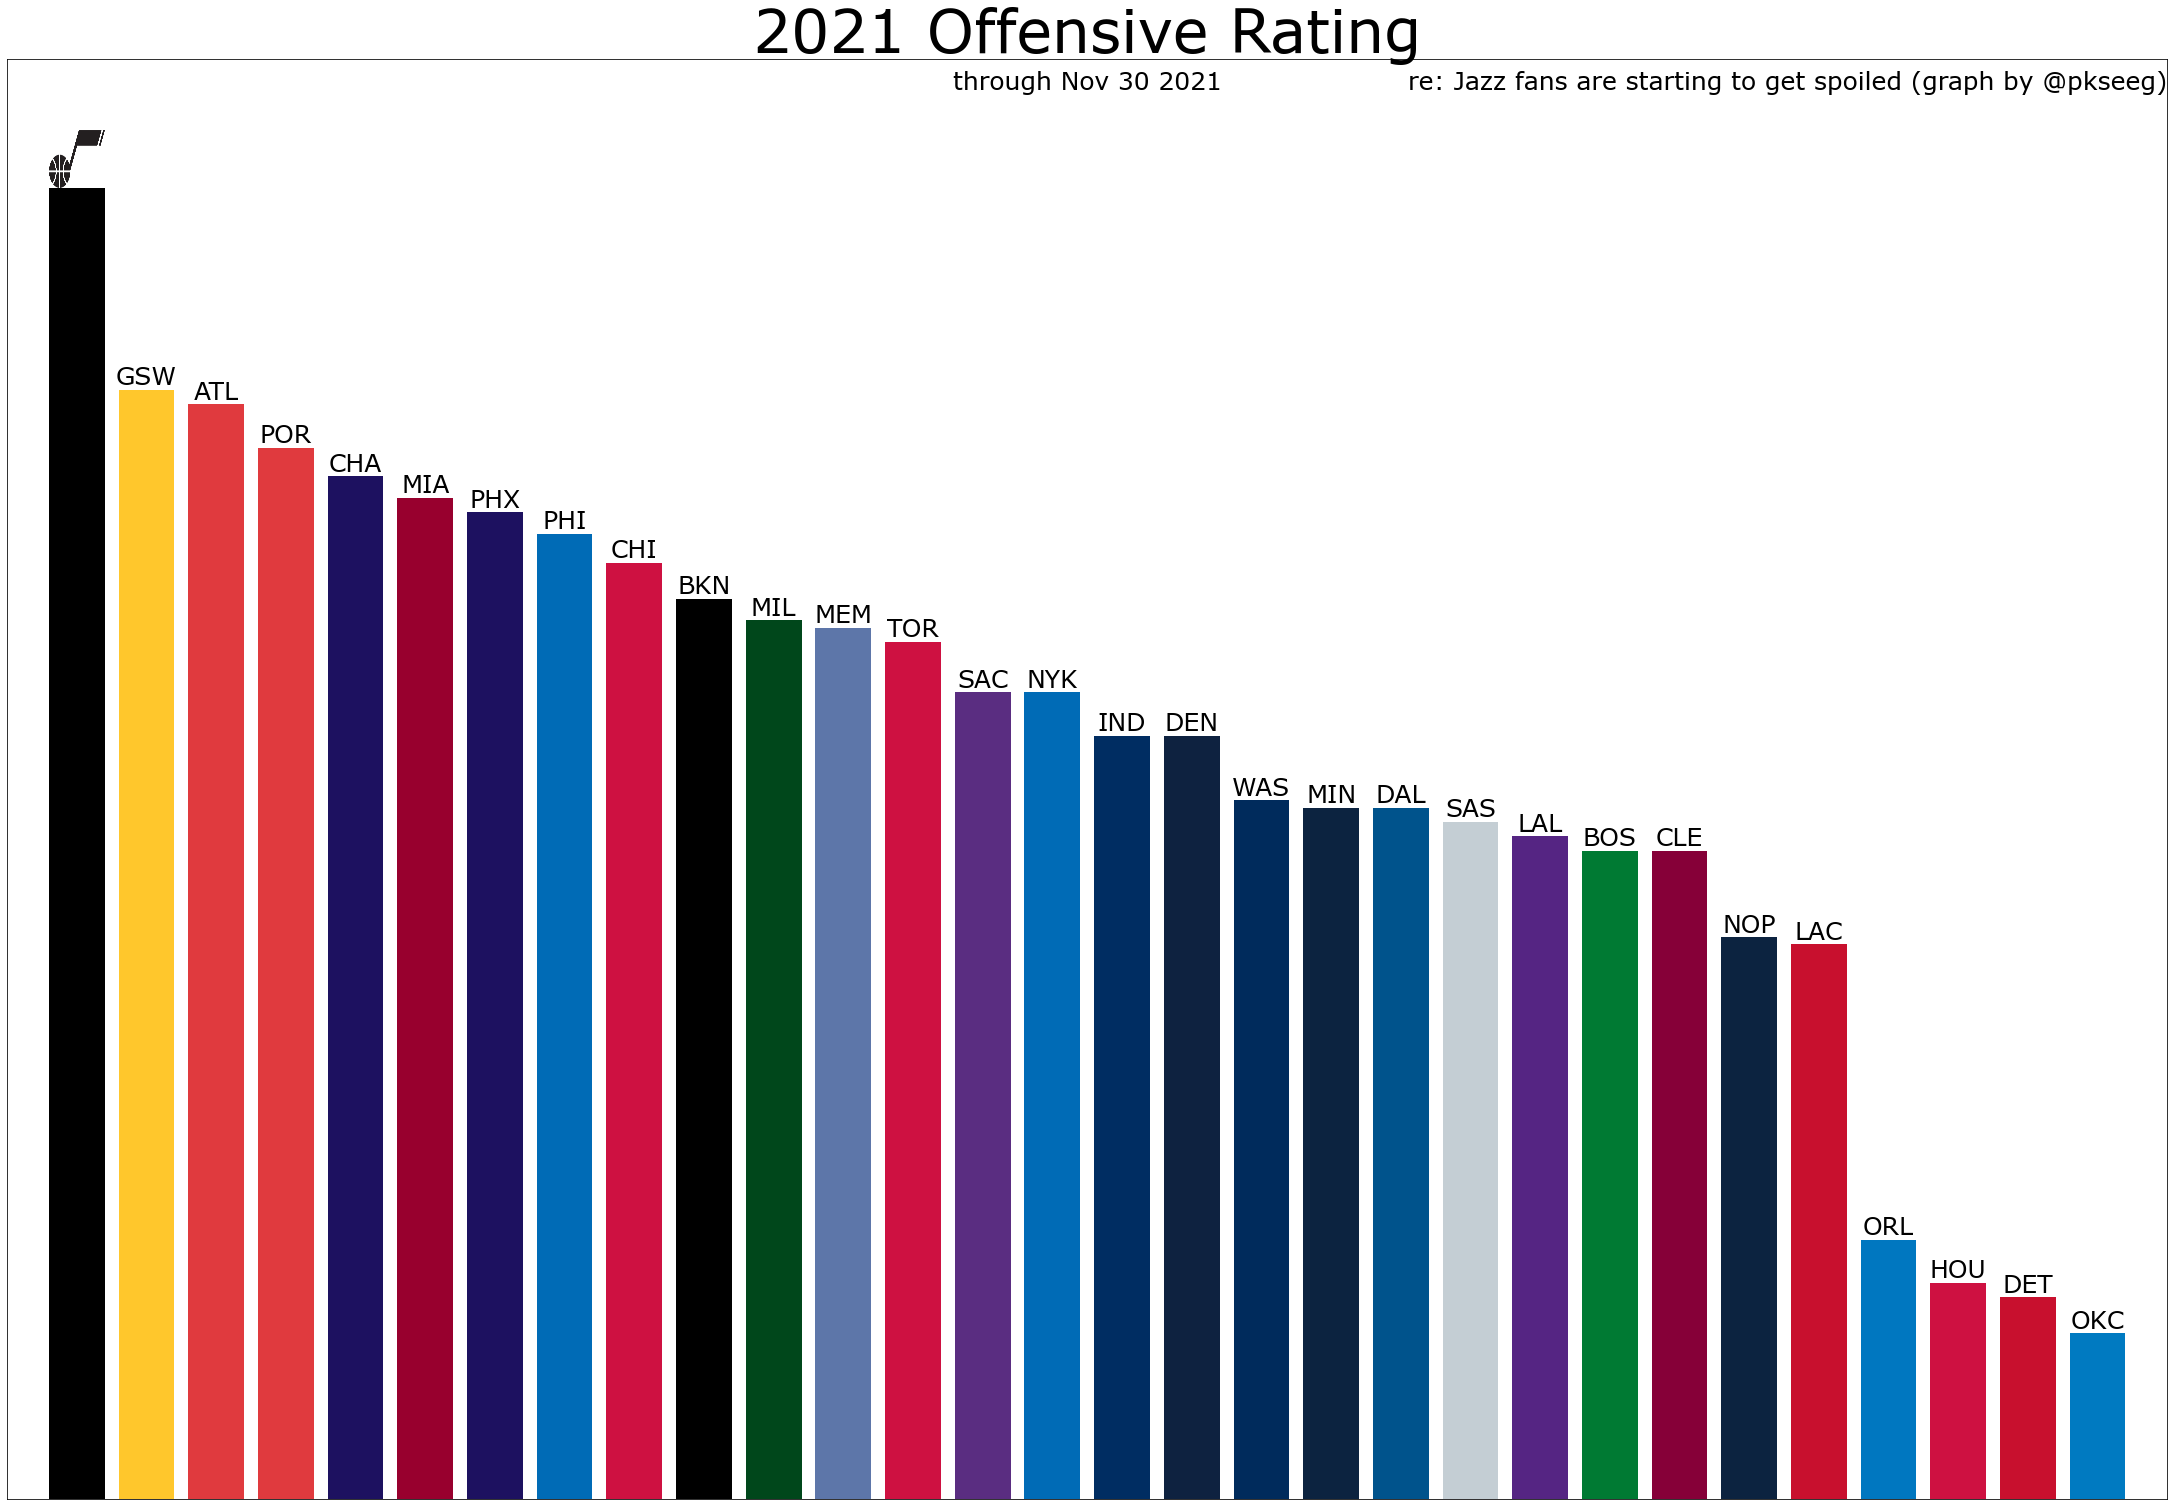

In [8]:
colors = [team_colors[n] for n in df['TEAM_ABBREVIATION']]
titlefont = {'fontname':'Verdana',
            'fontsize': 60}
subfont = {'fontname':'Verdana',
            'fontsize': 25}
ratio = 0
fig, ax = plt.subplots()
bars = ax.bar(df['TEAM_ABBREVIATION'], 
              df['OFF_RATING'],  
              color=colors)
for bar, name in zip(bars, df['TEAM_ABBREVIATION']):
    height = bar.get_height()
    if name=='UTA':
        ax.imshow(uta_logo, 
                  extent=get_img_loc(bar.get_x(),bar.get_height(),bar.get_width(), ratio),
                  aspect='auto')
    else:
        ax.text(bar.get_x() + bar.get_width() / 2.0, 
                 height, 
                 name, 
                 ha='center', 
                 va='bottom',
                 **subfont)
ax.tick_params(which='both',      
               bottom=False,        
               labelbottom=False,
               left=False,
               labelleft=False)
ax.set_ylim(97.0, 117.0)
ax.set_xlim(-1,len(df['TEAM_ABBREVIATION']))
ax.set_title('2021 Offensive Rating',**titlefont)
ax.text(14.5, 
        116.5,
        'through Nov 30 2021',
        ha='center', 
        va='bottom',
        **subfont)
ax.text(30, 
        116.5,
        're: Jazz fans are starting to get spoiled (graph by @pkseeg)',
        ha='right', 
        va='bottom',
        **subfont)
set_size(30,20)
plt.savefig('figures/jazz_offensive_rating.png', bbox_inches='tight', facecolor='#FFFFFF')
plt.show()